In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from numpy import array
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from catboost import Pool, CatBoostRegressor,CatBoostClassifier
scaler=MinMaxScaler(feature_range=(0,1))
from scipy.ndimage.interpolation import shift
import numpy as np
from sklearn.linear_model import LinearRegression,RidgeClassifier
from lineartree import LinearForestClassifier,LinearBoostClassifier,LinearTreeClassifier
from lineartree import LinearForestRegressor,LinearBoostRegressor,LinearTreeRegressor
import lightgbm
from lightgbm import LGBMRegressor,LGBMClassifier
from tsmoothie.smoother import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
#Scaler=MinMaxScaler()
#scaled_data = scaler.fit_transform(data)
#rescaledX = scaler.fit_transform(X)
#rescaledY = scaler.fit_transform(Y.reshape(-1,1))
#X=rescaledX
#Y=rescaledY
df1 = pd.read_csv(r"C:\Users\39333\desktop\ANACONDA\archivio.csv",header=None,sep=';')#,
                #columns=['data','ruota','1','2','3','4','5'])#,
df1.columns=['data','ruota','BA','BA1','BA2','BA3','BA4']
df1 = (df1.set_index(pd.DatetimeIndex(df1['data']))).drop('data',1)
                  #index_col=['Data'],parse_dates=['Data'],dayfirst=True)#, names=['Open','High','Low','Close'],na_values=['0'])
#df = df.loc['2010-04-04':'2022-06-21']
#df=(df[['BA','BA.1','BA.2','BA.3','BA.4']])
#df=df[['BA']]
#df=Scaler.fit_transform(df)
df1#['BA']
#df.drop(['Conc.'],1)
#df.groupby('BA')[['BA.1', 'BA.2', 'BA.3', 'BA.4']].sum()
#scaler=MinMaxScaler()
#df_scaled=scaler.fit_transform(df)
#df_scaled
#df#.tail(7)#.T
#df.info()
df1#.info()
df1.info()
df = df1[(df1.ruota == "BA")] 
df = df.loc['1940-04-04':'2022-08-18']
df=df.drop('ruota',1)#
#newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68255 entries, 1939-07-01 to 2022-08-20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ruota   61685 non-null  object
 1   BA      68255 non-null  int64 
 2   BA1     68255 non-null  int64 
 3   BA2     68255 non-null  int64 
 4   BA3     68255 non-null  int64 
 5   BA4     68255 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.6+ MB


In [134]:
df['training']=np.where(df['BA'].shift(1)>45,1,0)
df['STD5']=df['BA'].shift(1).rolling(5).std()
df['STD6']=df['BA'].shift(1).rolling(6).std()
df['STD7']=df['BA'].shift(1).rolling(7).std()
df['STD8']=df['BA'].shift(1).rolling(8).std()
df['STD9']=df['BA'].shift(1).rolling(9).std()
df['STD10']=df['BA'].shift(1).rolling(10).std()
#df['DIFF']=(df['BA'].shift(1)-df['STD5']).abs()
df.tail(10)

,BA,BA1,BA2,BA3,BA4,training,STD5,STD6,STD7,STD8,STD9,STD10
data,,,,,,,,,,,,
2022-07-23,21,52,10,37,88,0,16.807736,15.689699,18.073922,19.811613,18.907670,25.351090
2022-07-26,25,88,89,82,54,0,6.379655,15.083103,14.329457,16.766783,18.668155,18.004938
2022-07-28,58,10,3,65,2,0,6.949820,7.574079,13.986388,13.383759,15.690585,17.611865
2022-07-30,14,24,28,64,58,1,19.907285,18.008331,17.720045,18.805394,17.661949,18.329090
2022-02-08,80,17,86,13,30,0,19.034180,18.323937,16.826849,16.591198,17.919573,16.997059
2022-04-08,18,51,12,15,6,1,28.218788,27.983328,27.325202,25.712351,25.282295,24.679276
2022-06-08,57,30,70,56,69,0,28.740216,26.735744,26.310418,25.712351,24.348739,23.997454
2022-08-13,73,15,19,88,47,1,28.404225,26.735744,25.664502,25.878494,25.754180,24.707174
2022-08-16,69,74,57,62,18,1,30.761990,27.792085,27.073093,26.628395,27.263121,27.460072


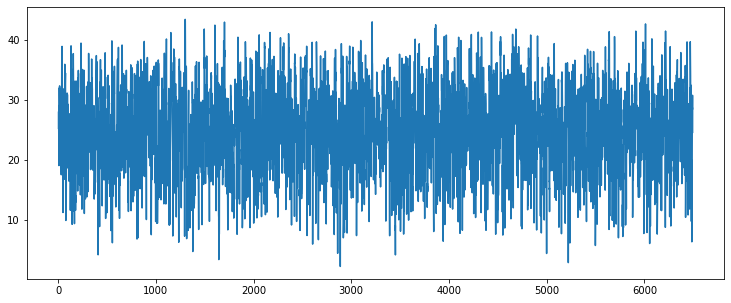

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure() 
fig.set_size_inches(12.5, 5)
plt.plot(df['STD5'].values)

In [135]:
df=df.reset_index().drop('data',1).dropna()
df

,BA,BA1,BA2,BA3,BA4,training,STD5,STD6,STD7,STD8,STD9,STD10
10,22,3,30,78,14,1,25.723530,23.894909,25.478282,25.207709,24.503968,24.057570
11,85,76,26,41,73,0,24.586582,25.372557,24.383835,25.051019,25.238859,24.882167
12,51,24,26,49,60,1,29.060282,26.449953,27.902893,26.322180,27.318085,26.801534
13,20,16,83,4,22,1,26.330591,26.107470,24.192679,25.837058,24.622709,25.778760
14,24,76,22,85,13,0,32.020306,28.798727,27.443448,25.491946,26.139583,25.254483
...,...,...,...,...,...,...,...,...,...,...,...,...
6489,18,51,12,15,6,1,28.218788,27.983328,27.325202,25.712351,25.282295,24.679276
6490,57,30,70,56,69,0,28.740216,26.735744,26.310418,25.712351,24.348739,23.997454
6491,73,15,19,88,47,1,28.404225,26.735744,25.664502,25.878494,25.754180,24.707174
6492,69,74,57,62,18,1,30.761990,27.792085,27.073093,26.628395,27.263121,27.460072


In [111]:
df.isnull().sum()

BA          0
BA1         0
BA2         0
BA3         0
BA4         0
training    0
STD5        0
STD6        0
STD7        0
STD8        0
STD9        0
STD10       0
DIFF        0
dtype: int64

In [136]:
df['BA']=np.where(df['BA']>45,1,0)
a = df.pop("training")
y = df.pop("BA")
X = df
X.shape, a.shape, y.shape

((6484, 10), (6484,), (6484,))

In [97]:
y.min()

1

In [137]:
from sklearn.linear_model import LogisticRegression
from causallib.estimation import IPW
from sklearn.linear_model import LogisticRegression

learner = LogisticRegression(penalty='none',  # No regularization, new in scikit-learn 0.21.*
                             solver='lbfgs',
                             max_iter=500)    # Increaed to achieve convergence with 'lbfgs' solver


In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

learner = Pipeline(steps=[('scaler', MinMaxScaler()),
                   #('pca', PCA(n_components=2)),
                   ('model', LogisticRegression())])#<RandomForestClassifier(random_state=42))])


In [144]:
ipw = IPW(learner)
ipw.fit(X, a)
outcomes = ipw.estimate_population_outcome(X, a, y)
effect = ipw.estimate_effect(outcomes[1], outcomes[0],effect_types=['diff','ratio'])
outcomes,effect

(0    0.499086
 1    0.507258
 dtype: float64,
 diff     0.008172
 ratio    1.016374
 dtype: float64)

In [139]:
from causallib.estimation import MarginalOutcomeEstimator

moe = MarginalOutcomeEstimator(None).fit(X, a, y)
outcomes = moe.estimate_population_outcome(X, a, y)
moe.estimate_effect(outcomes[1], outcomes[0])

diff    0.009208
dtype: float64

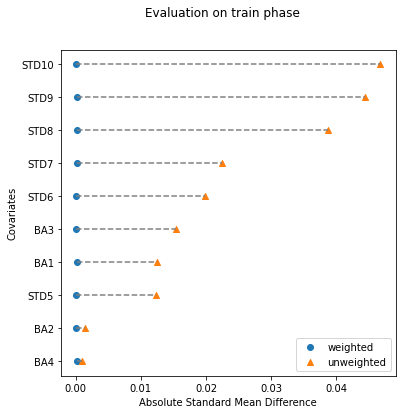

In [140]:
%matplotlib inline
from causallib.evaluation import PropensityEvaluator

evaluator = PropensityEvaluator(ipw)
evaluation_results = evaluator.evaluate_simple(X, a, y, plots=["covariate_balance_love"])

fig = evaluation_results.plots["covariate_balance_love"].get_figure()
fig.set_size_inches(6, 6)  # set a more compact size than default
fig;

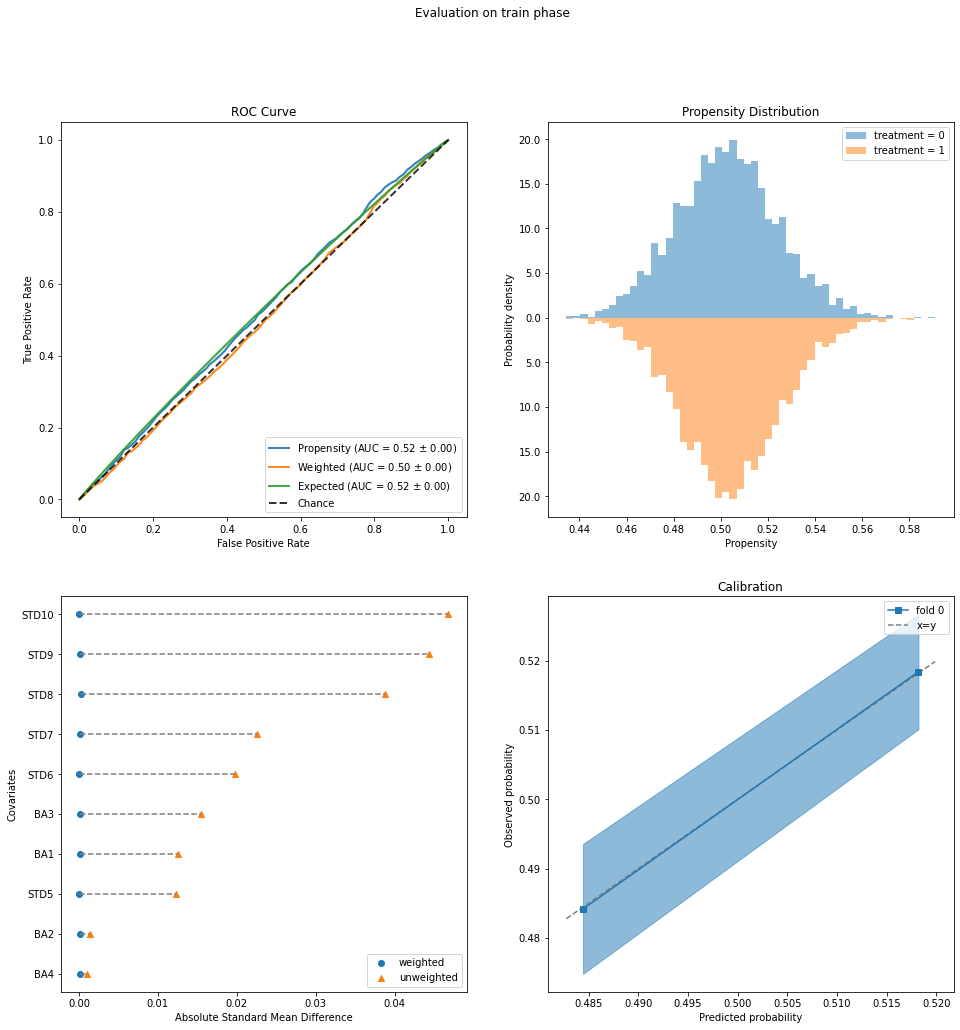

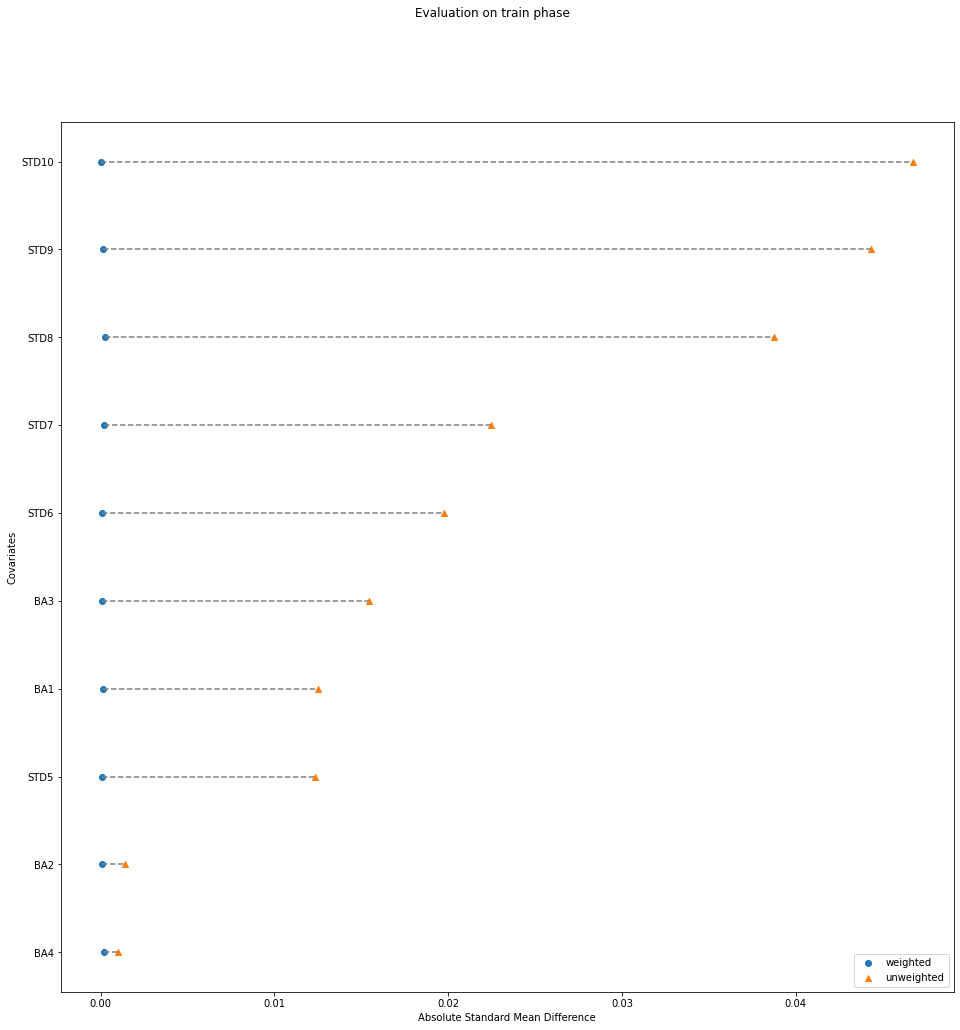

In [143]:
evaluator = PropensityEvaluator(ipw)
eval_results = evaluator.evaluate_simple(X, a, y, plots=["roc_curve",
                                                         "weight_distribution", 
                                                         "covariate_balance_love", "calibration"])
evaluator.evaluate_simple(X, a, y, plots=["covariate_balance_love"])

In [145]:
#################      ALTRO METODO DI STIMA   #########################

from sklearn.ensemble import GradientBoostingClassifier
from causallib.estimation import Standardization

#gb = LinearRegression()
gb = GradientBoostingClassifier()
std = Standardization(gb, predict_proba=True)
std.fit(X, a, y)


Standardization(encode_treatment=False, predict_proba=True,
                learner=GradientBoostingClassifier())

In [146]:
outcomes = std.estimate_population_outcome(X, a).xs(1, level='y')
print(outcomes)
std.estimate_effect(outcomes[0], outcomes[1], effect_types=['diff','ratio'])

training
0    0.503689
1    0.502992
dtype: float64


diff     0.000696
ratio    1.001384
dtype: float64